In [1]:
from pathlib import Path
csv_dir = Path("/home/lidonghaowsl/develop_win/hdd/Source/20250830")
hdf5_dir = Path("/home/lidonghaowsl/develop_win/hdd/data/Stability_PS")

In [2]:
from csv2hdf import batch_clean_json_files
batch_clean_json_files(directory=str(csv_dir), pattern = "test_info.json")

2025-08-31 17:50:05 - csv2hdf.clean_json - INFO - clean_json.py:124 - 已清理JSON文件: /home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_E1_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_e4bcd149/test_info.json
2025-08-31 17:50:05 - csv2hdf.clean_json - INFO - clean_json.py:125 - 输出到: /home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_E1_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_e4bcd149/test_info.json
2025-08-31 17:50:07 - csv2hdf.clean_json - INFO - clean_json.py:124 - 已清理JSON文件: /home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_E2_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_a9781db8/test_info.json
2025-08-31 17:50:07 - csv2hdf.clean_json - INFO - clean_json.py:125 - 输出到: /home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_E2_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_a9781db8/test_info.json
2025-08-31 17:50:08 - csv2hdf.clean_json - INFO - clean_json.py:124 - 已清

In [3]:
from pathlib import Path
from csv2hdf import process_folders_parallel

# 查找所有测试目录（包含test_info.json的目录）
import os
base_dir = str(csv_dir)
output_dir = str(hdf5_dir)

test_dirs = []
for root, dirs, files in os.walk(base_dir):
    if 'test_info.json' in files and root != output_dir:
        test_dirs.append(root)

results = process_folders_parallel(
    folders=test_dirs,
    out_dir=output_dir,
    num_workers=20,
    conflict_strategy='skip',  # 可选 'overwrite', 'skip', 'rename'
    show_progress=True,
)
for r in results:
    print(r)

Folders:   0%|          | 0/10 [00:00<?, ?folder/s]2025-08-31 17:50:28 - csv2hdf.direct_csv2hdf - INFO - direct_csv2hdf.py:250 - 开始直接转换: JSON=/home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_E1_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_e4bcd149/test_info.json, CSV_DIR=/home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_E1_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_e4bcd149 -> HDF5=/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/#20250825001-1-稳定性测试-test_20250825141031_e4bcd149.h5
2025-08-31 17:50:28 - csv2hdf.direct_csv2hdf - INFO - direct_csv2hdf.py:250 - 开始直接转换: JSON=/home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_G3_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_25b99663/test_info.json, CSV_DIR=/home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_G3_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_25b99663 -> HDF5=/home/lidonghaowsl/develop_win/hdd/data/S

JobResult(folder='/home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_E2_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_a9781db8', h5_path='/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/#20250825001-2-稳定性测试-test_20250825141031_a9781db8.h5', ok=True, message='OK (Direct New Format)', steps=10001, csv_written=None, workflow_stored=True, skipped=False)
JobResult(folder='/home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_G3_20250825141031_稳定性测试_20250825-141032_workflow_test_20250825141031_25b99663', h5_path='/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/#20250825002-3-稳定性测试-test_20250825141031_25b99663.h5', ok=True, message='OK (Direct New Format)', steps=10001, csv_written=None, workflow_stored=True, skipped=False)
JobResult(folder='/home/lidonghaowsl/develop_win/hdd/Source/20250830/Test_Unit_H2_20250825141032_稳定性测试_20250825-141032_workflow_test_20250825141032_78cd79a4', h5_path='/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/#2025

In [ ]:
from experiment import Experiment

# 加载你的数据
exp = Experiment('/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/#20250804008-3-稳定性测试-test_20250815134211_3fa6110a.h5')

# 获取数据概览
summary = exp.get_data_summary()

# Transfer数据访问 (0-based索引)
transfer_step0 = exp.get_transfer_step_measurement(0)
print(f"第1步Transfer: Vg={len(transfer_step0['Vg'])}点")

# Transient连续数据访问
transient_all = exp.get_transient_all_measurement()
print(f"Transient总时长: {transient_all['continuous_time'].max():.1f}秒")

# 检查数据类型
print(f"有Transfer数据: {exp.has_transfer_data()}")
print(f"有Transient数据: {exp.has_transient_data()}")

第1步Transfer: Vg=182点
Transient总时长: 125000.0秒
有Transfer数据: True
有Transient数据: True


In [1]:
from experiment import Experiment

# 加载你的数据
exp = Experiment('/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/#20250804008-3-稳定性测试-test_20250815134211_3fa6110a.h5')


In [2]:
# 获取数据概览
summary = exp.get_data_summary()

In [3]:
from pprint import pprint
pprint(summary, sort_dicts=False)

{'has_transfer_data': True,
 'has_transient_data': True,
 'file_path': '/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/#20250804008-3-稳定性测试-test_20250815134211_3fa6110a.h5',
 'format_version': '2.0_direct_new_storage',
 'transfer_data': {'step_count': 5001,
                   'measurement_data_shape': (5001, 2, 182),
                   'data_types': ['Vg', 'Id'],
                   'step_info_columns': ['step_index',
                                         'type',
                                         'start_time',
                                         'end_time',
                                         'reason',
                                         'data_file',
                                         'workflow_step_index',
                                         'workflow_total_steps',
                                         'workflow_path_readable',
                                         'workflow_iteration_info_type',
                                         '

In [4]:
pprint(exp.get_transfer_summary(), sort_dicts=False)

{'step_count': 5001,
 'measurement_data_shape': (5001, 2, 182),
 'data_types': ['Vg', 'Id'],
 'step_info_columns': ['step_index',
                       'type',
                       'start_time',
                       'end_time',
                       'reason',
                       'data_file',
                       'workflow_step_index',
                       'workflow_total_steps',
                       'workflow_path_readable',
                       'workflow_iteration_info_type',
                       'workflow_iteration_info_total',
                       'workflow_iteration_info_current']}


In [5]:
pprint(exp.get_transient_summary(), sort_dicts=False)

{'step_count': 5000,
 'total_data_points': 125000000,
 'measurement_data_shape': (3, 125000000),
 'step_info_columns': ['step_index',
                       'type',
                       'start_time',
                       'end_time',
                       'reason',
                       'data_file',
                       'workflow_step_index',
                       'workflow_total_steps',
                       'workflow_path_readable',
                       'workflow_iteration_info_type',
                       'workflow_iteration_info_total',
                       'workflow_iteration_info_current']}


In [6]:
pprint(exp.get_transient_step_measurement(4000))

{'continuous_time': array([100000.   , 100000.001, 100000.002, ..., 100024.997, 100024.998,
       100024.999]),
 'drain_current': array([-4.36833e-07, -5.58903e-07,  1.44222e-07, ...,  7.27557e-06,
        7.05828e-06,  7.07293e-06]),
 'original_time': array([1.0000e-03, 2.0000e-03, 3.0000e-03, ..., 2.4998e+01, 2.4999e+01,
       2.5000e+01])}


In [7]:
pprint(exp.get_transfer_step_measurement(5000))

{'Id': array([ 8.66878e-07,  1.61312e-07,  1.17366e-07,  3.67999e-08,
        4.61605e-07,  7.93636e-07, -2.17106e-07,  9.29522e-08,
        9.05108e-08,  2.98030e-07,  8.47347e-07,  2.80941e-07,
       -1.60954e-07,  4.95784e-07,  7.76546e-07, -9.99189e-08,
        3.00472e-07,  5.81234e-07,  2.27230e-07, -2.26265e-09,
        1.93050e-07, -1.70720e-07,  1.34456e-07,  4.90901e-07,
        1.10042e-07,  6.15413e-07,  8.71761e-07,  5.64144e-07,
       -1.19450e-07,  4.90901e-07, -3.12321e-07,  1.13787e-06,
       -1.02360e-07, -5.68669e-07,  9.84066e-07,  2.21514e-08,
        7.35042e-07,  8.10726e-07,  6.78890e-07,  2.34554e-07,
        6.69124e-07,  4.90069e-08,  3.93245e-07,  1.95491e-07,
        4.64046e-07,  5.29964e-07, -1.07243e-07,  2.94756e-08,
       -1.09685e-07,  7.83870e-07,  5.27523e-07,  8.05843e-07,
        3.17562e-07, -6.57392e-08,  6.56917e-07,  3.59066e-07,
        1.53987e-07,  9.91390e-07,  3.05355e-07,  1.24690e-07,
        6.93538e-07,  1.02718e-07,  5.22640e-07,

In [8]:
pprint(exp.get_transient_all_measurement(), sort_dicts=False)

# exp.get_transient_all_measurement()

警告: 正在加载所有transient数据，这可能会消耗大量内存
{'continuous_time': array([0.00000000e+00, 1.00000000e-03, 2.00000000e-03, ...,
       1.24999997e+05, 1.24999998e+05, 1.24999999e+05]),
 'original_time': array([1.0000e-03, 2.0000e-03, 3.0000e-03, ..., 2.4998e+01, 2.4999e+01,
       2.5000e+01]),
 'drain_current': array([-2.26265e-09,  6.25018e-06,  6.28924e-06, ...,  1.21112e-06,
        1.23309e-06,  1.13055e-06])}


In [9]:
pprint(exp.get_transfer_all_measurement(), sort_dicts=False)

警告: 正在加载所有transfer数据，这可能会消耗大量内存
{'measurement_data': array([[[-3.00000e-01, -2.90000e-01, -2.80000e-01, ..., -2.80000e-01,
         -2.90000e-01, -3.00000e-01],
        [ 3.20003e-07,  5.54378e-07, -2.42353e-08, ...,  4.24983e-07,
          2.05257e-07,  5.15316e-07]],

       [[-3.00000e-01, -2.90000e-01, -2.80000e-01, ..., -2.80000e-01,
         -2.90000e-01, -3.00000e-01],
        [ 8.74202e-07,  4.71370e-07,  5.47054e-07, ...,  9.05108e-08,
          1.61312e-07,  9.20589e-07]],

       [[-3.00000e-01, -2.90000e-01, -2.80000e-01, ..., -2.80000e-01,
         -2.90000e-01, -3.00000e-01],
        [ 4.34749e-07,  6.44710e-07, -2.78142e-07, ...,  5.03109e-07,
          2.51644e-07, -2.00017e-07]],

       ...,

       [[-3.00000e-01, -2.90000e-01, -2.80000e-01, ..., -2.80000e-01,
         -2.90000e-01, -3.00000e-01],
        [ 1.85726e-07,  4.22542e-07,  4.56722e-07, ...,  7.22835e-07,
         -9.50361e-08, -9.58687e-09]],

       [[-3.00000e-01, -2.90000e-01, -2.80000e-01, ..., -2.800

In [10]:
pprint(exp.get_batch_data(), sort_dicts=False)

In [13]:
transient = exp.get_transient_all_measurement()

警告: 正在加载所有transient数据，这可能会消耗大量内存


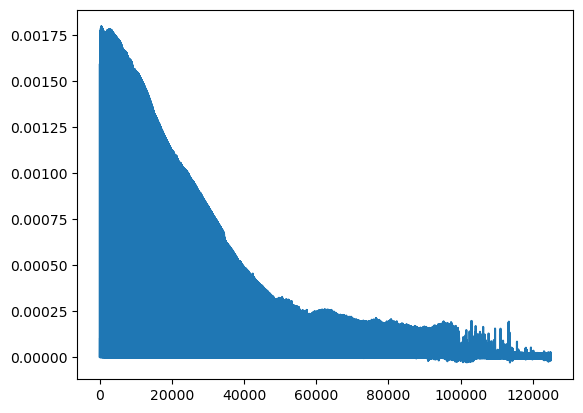

In [14]:
from matplotlib import pyplot as plt
plt.plot(transient['continuous_time'], transient['drain_current'])

In [25]:
transient_step = exp.get_transient_step_measurement(3000)

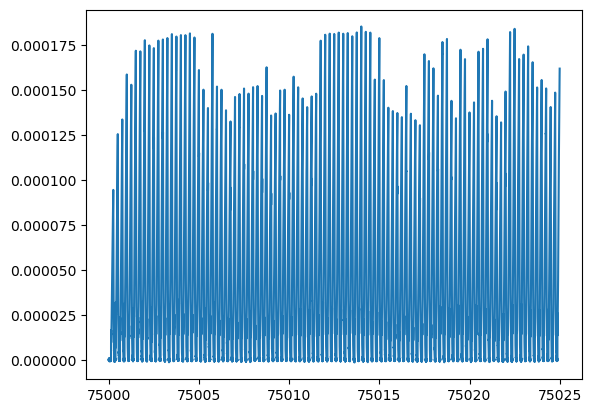

In [26]:
from matplotlib import pyplot as plt
plt.plot(transient_step['continuous_time'], transient_step['drain_current'])

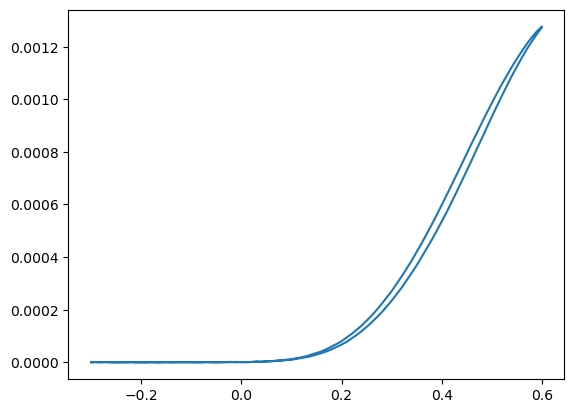

In [14]:
transfer_step = exp.get_transfer_step_measurement(1000)
from matplotlib import pyplot as plt
plt.plot(transfer_step['Vg'], transfer_step['Id'])

In [4]:
from pprint import pprint
attributes = exp.get_attributes()
pprint(attributes.get_test_info, sort_dicts=False)

<bound method ExperimentAttributes.get_test_info of ExperimentAttributes(sync_mode=True, batch_id='batch_20250815134210_78ab3cfe', test_id='test_20250815134211_3fa6110a', name='Test Unit G3_20250815134211', description='稳定性测试', test_unit_id='Test Unit G3', port='COM52', baudrate=512000, chip_id='#20250804008', device_number='3', created_at='2025-08-15T13:42:11.078657', completed_at='2025-08-20T07:45:58.523216', status='completed', total_steps=10001, completed_steps=10001, completion_percentage=100.0, export_time_utc='2025-08-27T05:53:01.665370+00:00', output_filename='#20250804008-3-稳定性测试-test_20250815134211_3fa6110a.h5', source_folder_name='Test_Unit_G3_20250815134211_稳定性测试_20250815-134211_workflow_test_20250815134211_3fa6110a', source_folder_path='/home/lidonghaowsl/develop_win/hdd/Source/20250815BBL不同封装稳定性/Test_Unit_G3_20250815134211_稳定性测试_20250815-134211_workflow_test_20250815134211_3fa6110a', source_json_name='test_info.json')>


In [ ]:
from experiment import Experiment

# 加载实验
exp = Experiment('your_file.h5')

# 获取所有属性
attrs = exp.get_attributes()
print(attrs)

# 属性内容

# get_attributes() 返回一个 ExperimentAttributes 对象，包含：

# 基本测试信息：
# - test_id - 测试ID
# - batch_id - 批次ID
# - name - 实验名称
# - description - 描述
# - sync_mode - 同步模式

# 测试单元信息：
# - test_unit_id - 测试单元ID
# - port - 串口
# - baudrate - 波特率

# 设备信息：
# - chip_id - 芯片ID
# - device_number - 设备编号

# 时间信息：
# - created_at - 创建时间
# - completed_at - 完成时间

# 进度信息：
# - status - 状态
# - total_steps - 总步骤数
# - completed_steps - 已完成步骤
# - completion_percentage - 完成百分比

# 访问方式

# 方式1：直接访问属性对象
attrs = exp.get_attributes()
print(f"测试ID: {attrs.test_id}")
print(f"芯片ID: {attrs.chip_id}")

# 方式2：便捷访问（推荐）
print(f"测试ID: {exp.test_id}")
print(f"芯片ID: {exp.chip_id}")

# 方式3：转换为字典
attr_dict = exp.to_dict()
print(attr_dict)

# 实际示例



In [5]:
# 你的文件
exp = Experiment('/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/#20250804008-3-稳定性测试-test_20250815134211_3fa6110a.h5')

# 查看所有属性
attrs = exp.get_attributes()
print(f"实验: {attrs.name}")
print(f"状态: {attrs.status}")
print(f"进度: {attrs.completion_percentage}%")
print(f"芯片: {attrs.chip_id}")

实验: Test Unit G3_20250815134211
状态: completed
进度: 100.0%
芯片: #20250804008


In [2]:

exp.get_experiment_summary()
print(exp.get_timing_info())
print(exp.get_test_unit_info())
print(exp.get_device_info())
print(exp.get_test_info())
print(exp.get_progress_info())



print(exp.has_workflow())
print(exp.get_workflow_summary())
print(exp.get_workflow())
exp.export_workflow('workflow.json')



{'created_at': '2025-08-15T13:42:11.078657', 'completed_at': '2025-08-20T07:45:58.523216', 'duration': '4天18小时3分钟47秒'}
{'test_unit_id': 'Test Unit G3', 'port': 'COM52', 'baudrate': 512000}
{'chip_id': '#20250804008', 'device_number': '3'}
{'sync_mode': True, 'batch_id': 'batch_20250815134210_78ab3cfe', 'test_id': 'test_20250815134211_3fa6110a', 'name': 'Test Unit G3_20250815134211', 'description': '稳定性测试'}
{'status': 'completed', 'total_steps': 10001, 'completed_steps': 10001, 'completion_percentage': 100.0, 'is_completed': True}
True
{'has_workflow': True, 'total_steps': 2, 'step_types': {'loop': 1, 'transfer': 2, 'transient': 1}, 'total_loops': 1, 'max_loop_iterations': 5000, 'nested_step_count': 2}
[LoopConfig(id='74fa4619-5c2f-414f-942b-cb08a90754bd', type='loop', iterations=5000, steps=[TransferStepConfig(id='04d6fb06-0d85-4ab4-a3ca-175309407ae9', type='transfer', command_id=1, params={'isSweep': 1, 'timeStep': 300, 'sourceVoltage': 0, 'drainVoltage': 100, 'gateVoltageStart': -300

True